Analyse this dataset: [1] which looks like this:

[ -5.34023562,   4.7472463 ,   3.82332607],
[ -9.58706542,  -3.43446551,   9.70183939],
[ -8.38501223,  -3.90279369,   8.51462008],
[  5.7082258 ,   2.65857479,   5.40448245],
[ -7.43166517,  -4.39025105,   9.00321635],
[  5.028509  ,   9.04769521,  -8.54843651],
[  6.37219562,   4.45994039,   4.36935755],
[ -8.35525163,  -3.51695636,   7.16271385],
[ -3.40526552,   2.28142739,  -7.63117179],
[  5.62156138,   3.43105644,   4.66657363],
...
and 90 more => n = 100
Now answer these two questions:

A) What is the best k? (usually derived by plotting each graph ;-)

B) Can you print the clustering vector?

(e.g. point i=1 belongs to cluster 1, point i=5 belongs to cluster 2, ...)

In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
path = './data/edlich-kmeans-A0.csv'
df = pd.read_csv(path)
df.head()

,V1,V2,V3
0,-5.340236,4.747246,3.823326
1,-9.587065,-3.434466,9.701839
2,-8.385012,-3.902794,8.514620
3,5.708226,2.658575,5.404482
4,-7.431665,-4.390251,9.003216


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      100 non-null    float64
 1   V2      100 non-null    float64
 2   V3      100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


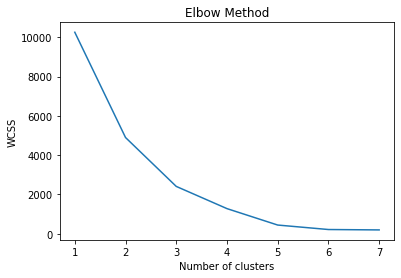

In [14]:
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/tmp/ipykernel_9340/320565094.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)


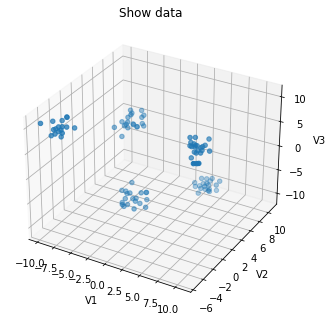

In [29]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=Axes3D(fig)
ax.set_title("Show data")
ax.set_xlabel('V1')
ax.set_ylabel('V2')
ax.set_zlabel('V3')
ax.scatter(df['V1'],df['V2'],df['V3'])
plt.show()

In [43]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(df)
clusters
result = []
i = 1;
for cluster in clusters:
  #result[i] = cluster
  result.append(['point ' + str(i), 'belongs to cluster ' + str(cluster)])
  i = i + 1
result

[['point 1', 'belongs to cluster 4'],
 ['point 2', 'belongs to cluster 1'],
 ['point 3', 'belongs to cluster 1'],
 ['point 4', 'belongs to cluster 2'],
 ['point 5', 'belongs to cluster 1'],
 ['point 6', 'belongs to cluster 0'],
 ['point 7', 'belongs to cluster 2'],
 ['point 8', 'belongs to cluster 1'],
 ['point 9', 'belongs to cluster 3'],
 ['point 10', 'belongs to cluster 2'],
 ['point 11', 'belongs to cluster 1'],
 ['point 12', 'belongs to cluster 3'],
 ['point 13', 'belongs to cluster 2'],
 ['point 14', 'belongs to cluster 0'],
 ['point 15', 'belongs to cluster 4'],
 ['point 16', 'belongs to cluster 1'],
 ['point 17', 'belongs to cluster 3'],
 ['point 18', 'belongs to cluster 0'],
 ['point 19', 'belongs to cluster 4'],
 ['point 20', 'belongs to cluster 4'],
 ['point 21', 'belongs to cluster 1'],
 ['point 22', 'belongs to cluster 3'],
 ['point 23', 'belongs to cluster 4'],
 ['point 24', 'belongs to cluster 1'],
 ['point 25', 'belongs to cluster 1'],
 ['point 26', 'belongs to cluster 